In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from collections import deque
import random
import tensorflow as tf

env = gym.make("CartPole-v1")
state = env.reset()

In [ ]:
model = Sequential()
model.add(Dense(units = 50, input_dim=4, activation='relu'))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 2, activation = "linear"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='MSE',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,902
Trainable params: 2,902
Non-trainable params: 0
_________________________________________________________________


------------------------------------

In [9]:
train_episodes = 200
epsilon = 0.25
gamma = 0.99
max_steps = 150
state = env.reset()

In [10]:
Loss = []
Rewards = []

for e in range(1, train_episodes+1):
  epsilon = epsilon - (1/train_episodes)
  total_reward = 0
  t = 0

  state = env.reset()
  state = np.reshape(state, [1, 4])  
  
  done = False
  while t < max_steps and done == False:

    Qs = model.predict(state)[0]

    if np.random.rand()<epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Qs)

    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, 4])

    total_reward += reward

   
    if done:
      y = reward
    else:
      y = reward + gamma*np.max(model.predict(next_state)[0])
    
    Q_target = model.predict(state)
    Q_target[0][action] = y
          
    h = model.fit(state,Q_target,epochs=1,verbose=0)

    loss = h.history['loss'][0]
    
    state = next_state
    t+=1
  
  print(e," R=",total_reward," L=",loss)
  Rewards.append(total_reward)
  Loss.append(loss)
  

1  R= 150.0  L= 0.023070722818374634
2  R= 136.0  L= 12222.078125
3  R= 9.0  L= 5968.150390625
4  R= 9.0  L= 4701.3642578125
5  R= 11.0  L= 2961.9814453125
6  R= 12.0  L= 1939.6571044921875
7  R= 11.0  L= 1110.029541015625
8  R= 11.0  L= 1722.467041015625
9  R= 13.0  L= 1432.7716064453125
10  R= 21.0  L= 2730.0068359375
11  R= 18.0  L= 2725.63232421875
12  R= 81.0  L= 630.0613403320312
13  R= 25.0  L= 699.1906127929688
14  R= 18.0  L= 820.73828125
15  R= 20.0  L= 624.19091796875
16  R= 21.0  L= 402.4720458984375
17  R= 27.0  L= 203.1129150390625
18  R= 38.0  L= 109.07115936279297
19  R= 150.0  L= 0.7853657603263855
20  R= 150.0  L= 0.07984047383069992
21  R= 150.0  L= 0.0008107536705210805
22  R= 150.0  L= 0.22515985369682312
23  R= 97.0  L= 551.388427734375
24  R= 150.0  L= 0.08807750791311264
25  R= 122.0  L= 603.6773071289062
26  R= 103.0  L= 253.94410705566406
27  R= 150.0  L= 0.14090056717395782
28  R= 128.0  L= 113.22408294677734
29  R= 142.0  L= 97.55011749267578
30  R= 147.0  L

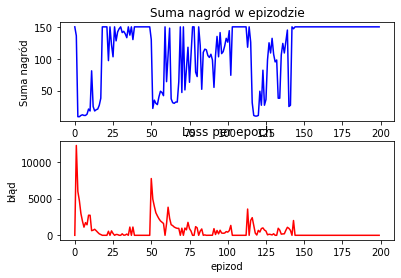

In [12]:
plt.subplot(211)
plt.ylabel('Suma nagród')  
plt.title('Suma nagród w epizodzie')
plt.plot(list(range(train_episodes)),Rewards,"b")

plt.subplot(212)
plt.xlabel('epizod')
plt.ylabel('błąd')  
plt.title('Loss per epoch')
plt.plot(list(range(train_episodes)),Loss,"r")

plt.show()